## INNOMATICS RESEARCH LABS

### NAME : ALMAS BANU

### DIAMOND PRICE PREDICTION TASK

 ### Title : Diamonds Dataset
 1. The seventh column 'price' is the values to be predicted.
 2. Data Type : Mixed ( Numerical + Categorical)
 3. Dataset has nearly 54000 instances.
 4. It has 10 features.
 5. Features
    price : price in US dollars ($ 326 -  $ 18,823)    
    carat : weight of the diamond   (0.2--5.01)
    cut   : quality of the cut    (Fair, Good, Very Good, Premium, Ideal)
    color : diamond colour, from J (worst) to D (best)    
    clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))    
    x : length in mm (0 - 10.74)   
    y : width in mm (0 - 58.9)    
    z : depth in mm (0 - 31.8)    
    depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 -- 79)
    table : width of top of diamond relative to widest point (43 -- 95)

#### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv("dataset/diamonds.csv")

#### Lets Explore the given dataset

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Number of rows and columns using shape function

In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Checking for any null value

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### No null values

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### As we know that our Target is price column so we will assign it to target_df dataframe.

In [8]:
target_df = df[['price']]

In [9]:
target_df.head()

,price
0,326
1,326
2,327
3,334
4,335


#### Dropping the Target column from Original DataFrame

In [10]:
df = df.drop('price',axis = 1)

In [11]:
df.head(8)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53


In [12]:
df.shape

(53940, 9)

### Concating target column at the end of columns

In [13]:
df = pd.concat([df,target_df], axis = 1)

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


#### Now,what is the shape of dataframe??

In [15]:
df.shape

(53940, 10)

In [16]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


### See the min value for len,width and breadth(x,y,z) it is 0.This can be missing values which are assigned as 0.Lets list them.

In [17]:
df[['x','y','z']][(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,x,y,z
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


#### What to do with this columns which 0 as value We can rename it NAN and drop them.(As they are very less)

In [18]:
df[['x','y','z']] = df[['x','y','z']].replace(0, np.NaN)

#### Checking for null values

In [19]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
x           8
y           7
z          20
price       0
dtype: int64

#### There are 8,7,20 NAN values now in x,y and z columns Lets drop them

In [20]:
df.dropna(inplace = True)

#### Lets check again for NULL values

In [21]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Data Visualization

#### Univariate Analysis

#### Boxplot of carat column

<AxesSubplot:>

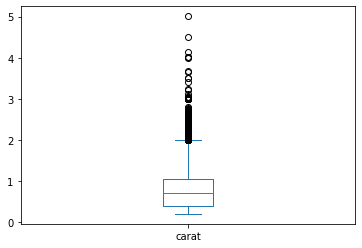

In [22]:
df['carat'].plot.box()

#### Box plot of table column

<AxesSubplot:>

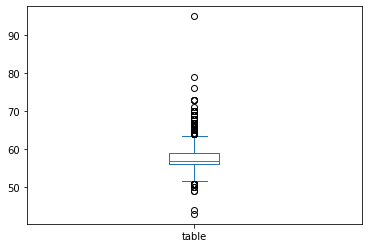

In [23]:
df['table'].plot.box()

#### Boxplot of depth column

<AxesSubplot:>

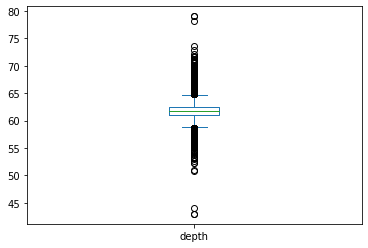

In [24]:
df['depth'].plot.box()

#### Boxplot of 'x column 

<AxesSubplot:>

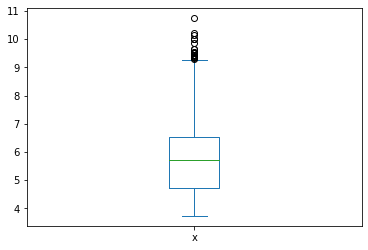

In [25]:
df['x'].plot.box()

#### Boxplot of 'y' column

<AxesSubplot:>

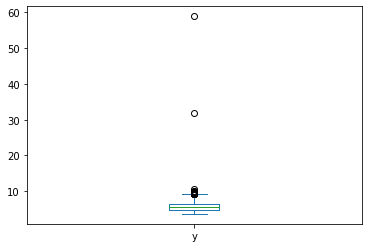

In [26]:
df['y'].plot.box()

#### Boxplot of 'z' column

<AxesSubplot:>

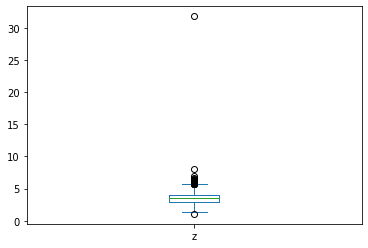

In [27]:
df['z'].plot.box()

#### For Categorical Columns

<AxesSubplot:>

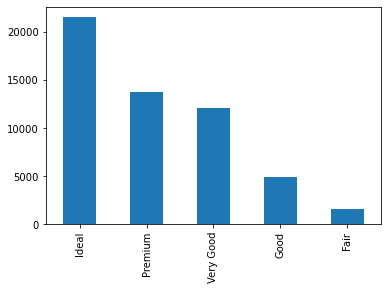

In [28]:
df['cut'].value_counts().plot.bar() #Barplot

#### Ideal cut is highest in number and Fair is least

#### Barplot of 'clarity' column

<AxesSubplot:>

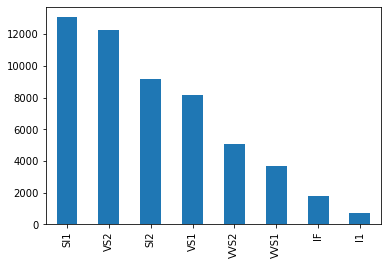

In [29]:
df['clarity'].value_counts().plot.bar()

#### Clarity SI1 is highest and I1 is least

#### Barplot of 'color' column

<AxesSubplot:>

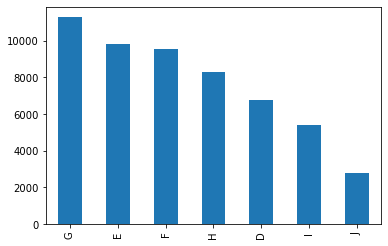

In [30]:
df['color'].value_counts().plot.bar()

#### 'G' color is more and 'J' is in less in number 

### Bivariate analysis

#### Pairplot for all columns

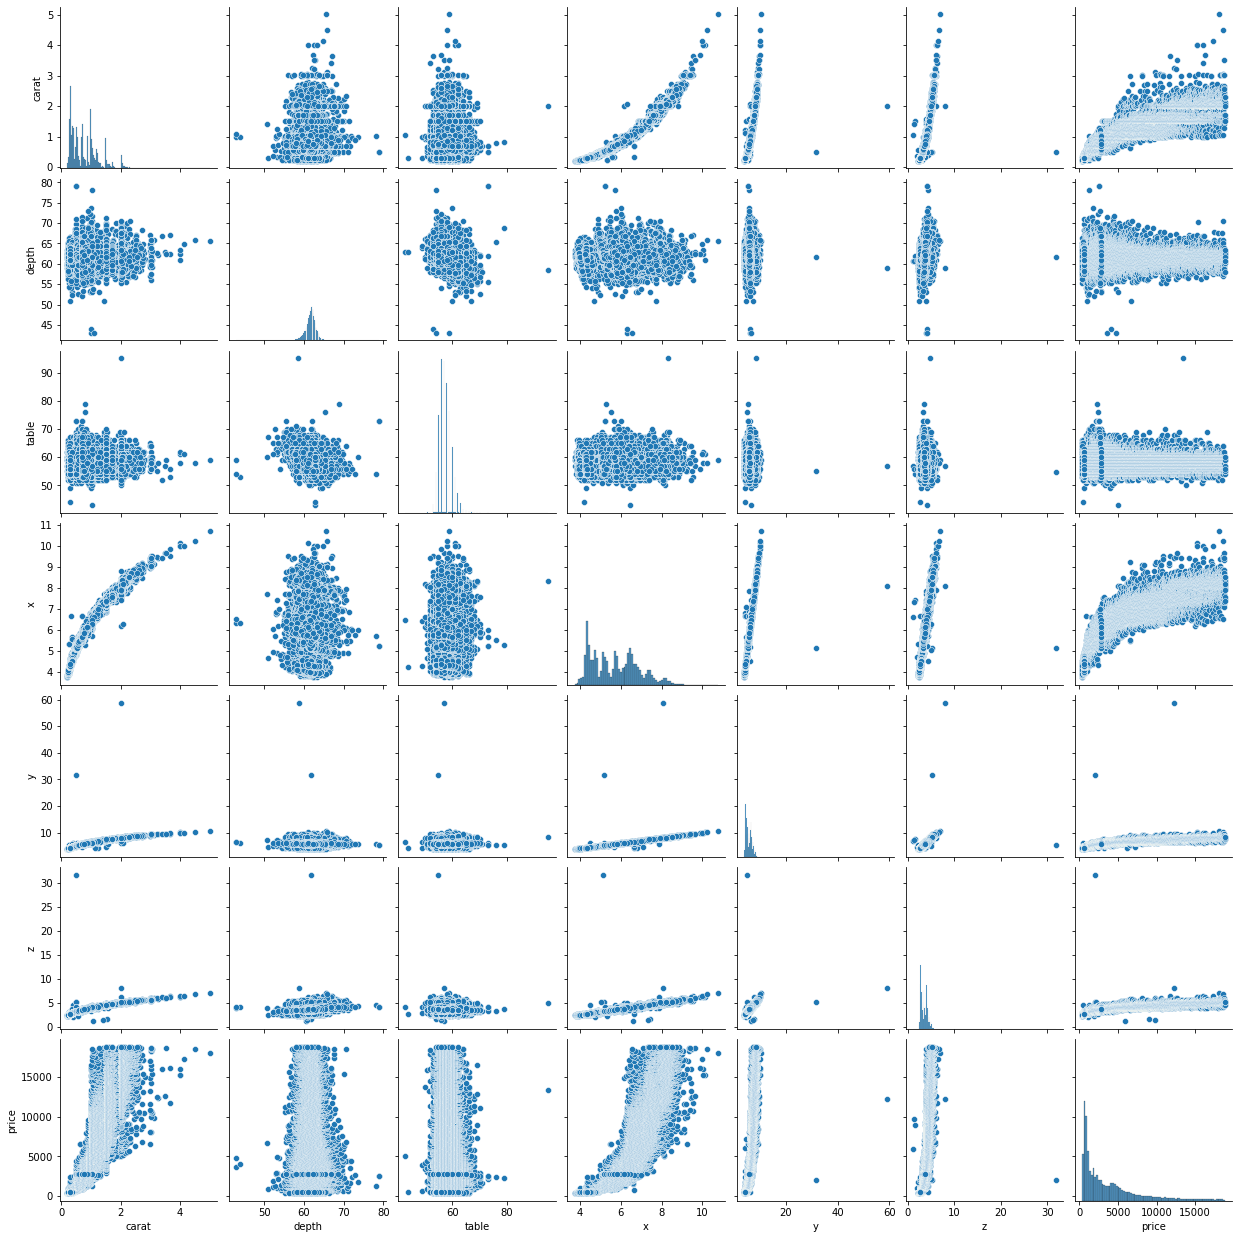

In [31]:
sns.pairplot(df)

#### Lets see it closely between carat,depth,table,x,y,z and price

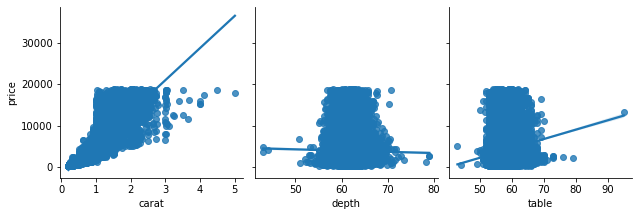

In [32]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth', 'table'] , y_vars =  ['price'] , kind = 'reg')

#### Pairplot for x,y,z columns against price

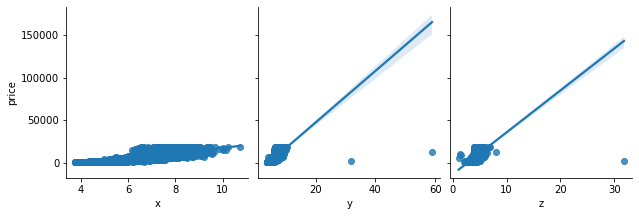

In [33]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['x','y', 'z'] , y_vars =  ['price'] , kind = 'reg')

#### CORRELATION

In [34]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.028259,0.181646,0.977779,0.953991,0.961048,0.921592
depth,0.028259,1.000000,-0.295733,-0.025017,-0.029069,0.095023,-0.010729
table,0.181646,-0.295733,1.000000,0.196097,0.184493,0.152483,0.127245
x,0.977779,-0.025017,0.196097,1.000000,0.974918,0.975435,0.887231
y,0.953991,-0.029069,0.184493,0.974918,1.000000,0.956744,0.867864
z,0.961048,0.095023,0.152483,0.975435,0.956744,1.000000,0.868206
price,0.921592,-0.010729,0.127245,0.887231,0.867864,0.868206,1.000000


#### HEATMAP

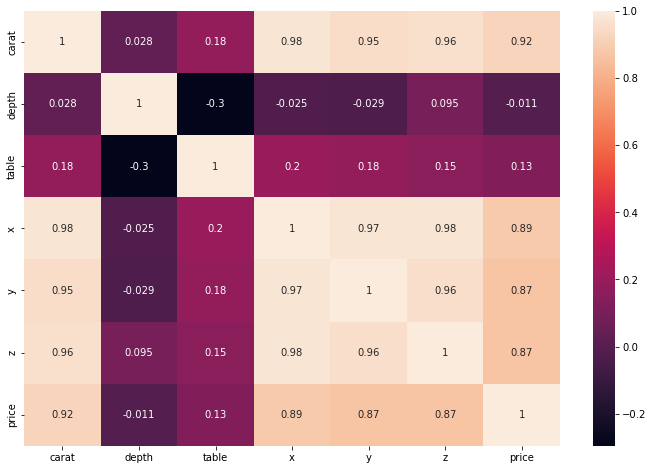

In [35]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df_corr , xticklabels = df_corr.columns , yticklabels = df_corr.columns , annot=True)

### From above heatmap we can observe that there is high correlation between carat,x,y,z and price.

#### Bivariate Analysis on Categorical - Numerical Variables

##### Barplot for Cut and Price

<AxesSubplot:xlabel='cut'>

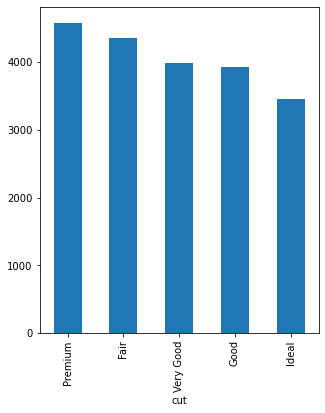

In [36]:
fig, ax = plt.subplots(figsize=(5,6))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

##### cut v/s price Premium,Fair,Very Good,Good,Ideal

##### Barplot of clarity and price

<AxesSubplot:xlabel='clarity'>

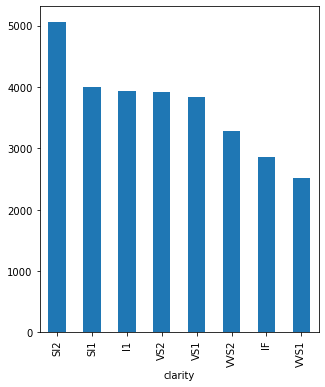

In [37]:
fig, ax = plt.subplots(figsize=(5,6))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

##### clarity v/s price SI2,SI1,I1,VS2,VS1,WS2,IF,WS1 

#### Barplot of color and price column

<AxesSubplot:xlabel='color'>

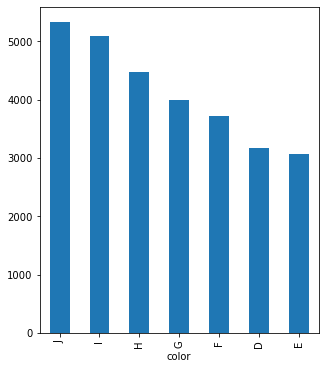

In [38]:
fig, ax = plt.subplots(figsize=(5,6))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

##### color v/s price J,I,H,G,F,D,E 

#### Splitting the Target and other independent Columns

In [39]:
# drop price column 
X = df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']] 

In [40]:
# Target variable
y = df[['price']]

In [41]:
X.head()

,carat,cut,color,clarity,x,y,z
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75


In [42]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


#### Splitting Data into Train and Test Data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [44]:
#Lets see the shapes of test and train data
print("Test data size : ",X_test.shape,y_test.shape)
print("Train data size : ",X_train.shape,y_train.shape)

Test data size :  (13480, 7) (13480, 1)
Train data size :  (40440, 7) (40440, 1)


#### Label Encoding For cut,color and clarity because it has some names for each category 

In [45]:
X_train.head()

,carat,cut,color,clarity,x,y,z
42571,0.38,Premium,E,VVS1,4.66,4.62,2.87
20932,1.51,Very Good,E,SI2,7.30,7.35,4.48
3488,0.90,Good,I,VS2,6.06,6.13,3.81
11868,1.16,Ideal,I,SI1,6.71,6.75,4.20
27500,2.07,Ideal,H,SI2,8.12,8.09,5.14


In [46]:
X_test.head()

,carat,cut,color,clarity,x,y,z
10219,1.00,Ideal,E,SI2,6.39,6.43,3.96
22845,1.51,Good,E,SI2,7.54,7.50,4.43
43017,0.50,Ideal,H,VS1,5.12,5.15,3.18
35171,0.31,Ideal,G,IF,4.38,4.41,2.68
1456,0.80,Ideal,E,SI2,6.00,6.03,3.67


In [47]:
from sklearn.preprocessing import LabelEncoder
# For train data
lae = LabelEncoder()
X_train['cut']=lae.fit_transform(X_train['cut'])
X_train['color']=lae.fit_transform(X_train['color'])
X_train['clarity']=lae.fit_transform(X_train['clarity'])
# For test data
X_test['cut']=lae.fit_transform(X_test['cut'])
X_test['color']=lae.fit_transform(X_test['color'])
X_test['clarity']=lae.fit_transform(X_test['clarity'])

In [48]:
X_train.head()

,carat,cut,color,clarity,x,y,z
42571,0.38,3,1,6,4.66,4.62,2.87
20932,1.51,4,1,3,7.30,7.35,4.48
3488,0.90,1,5,5,6.06,6.13,3.81
11868,1.16,2,5,2,6.71,6.75,4.20
27500,2.07,2,4,3,8.12,8.09,5.14


In [49]:
X_test.head()

,carat,cut,color,clarity,x,y,z
10219,1.00,2,1,3,6.39,6.43,3.96
22845,1.51,1,1,3,7.54,7.50,4.43
43017,0.50,2,4,4,5.12,5.15,3.18
35171,0.31,2,3,1,4.38,4.41,2.68
1456,0.80,2,1,3,6.00,6.03,3.67


#### Data Pre-Processing on Training Data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,x,y,z
42571,-0.878915,0.433608,-0.938711,1.249494,-0.955968,-0.974668,-0.948150
20932,1.492943,1.405944,-0.938711,-0.488110,1.396467,1.410026,1.326393
3488,0.212560,-1.511064,1.413702,0.670292,0.291536,0.344339,0.379844
11868,0.758297,-0.538728,1.413702,-1.067312,0.870733,0.885918,0.930820
27500,2.668378,-0.538728,0.825599,-0.488110,2.127147,2.056427,2.258814


#### Data Pre-Processing on Test Data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_rescaled = pd.DataFrame(scaler.fit_transform(X_test),
                                columns = X_test.columns,
                                index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,x,y,z
10219,0.440969,-0.536509,-0.931771,-0.473453,0.595902,0.619799,0.616631
22845,1.535855,-1.511717,-0.931771,-0.473453,1.631123,1.570118,1.301428
43017,-0.632448,-0.536509,0.828932,0.108488,-0.547341,-0.517032,-0.519841
35171,-1.040347,-0.536509,0.242031,-1.637334,-1.213484,-1.174262,-1.248348
1456,0.011602,-0.536509,-0.931771,-0.473453,0.244828,0.264539,0.194096


#### Creating Models to find the best model for price prediction.

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_rescaled, y_train)

LinearRegression()

In [53]:
y_test_pred = lr.predict(X_test_rescaled)

#### Checking the accuracy of LR model using sklearn metrics module

In [54]:
from sklearn import metrics
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) : " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2 Score : " , metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE):  868.3757075526597
Mean Squared Error (MSE) :  1767565.5433552004
Root Mean Squared Error (RMSE) :  1329.4982299180397
R2 Score :  0.8856129275395281


### Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor
decreg = DecisionTreeRegressor()
decreg.fit(X_train_rescaled, y_train)

DecisionTreeRegressor()

In [56]:
y_test_pred = decreg.predict(X_test_rescaled)

#### Checking the accuracy of DecisionTreeRegressor model using sklearn metrics module

In [57]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) : " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2 Score : " , metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE):  387.56921364985163
Mean Squared Error (MSE) :  568775.832447247
Root Mean Squared Error (RMSE) :  754.1722830012033
R2 Score :  0.9631919718029748


#### KNN Regression (K-Nearest Neighbor)

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [59]:
y_test_pred = knn_reg.predict(X_test_rescaled)

#### Checking the accuracy of KNN Regressor model using sklearn metrics module

In [60]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) : " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2 Score : " , metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE):  311.16408011869436
Mean Squared Error (MSE) :  394454.3211661721
Root Mean Squared Error (RMSE) :  628.0559856940877
R2 Score :  0.9744730965212565


### RandomForest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rescaled, y_train)

RandomForestRegressor()

In [62]:
y_test_pred = rf_reg.predict(X_test_rescaled)

In [63]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) : " , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2 Score : " , metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error (MAE):  284.3476590875371
Mean Squared Error (MSE) :  315112.2333813089
Root Mean Squared Error (RMSE) :  561.3485845544717
R2 Score :  0.9796076779113104


### Observation :

#### Accuracy of RandomForestRegressor is highest among all the other models.
#### But when i tried to save it as model it is consuming more space (Large File Size 2,79,402 KB).So we can choose KNN (The second best model) for predicting the diamond price.

### Serialization & De-Serialization for creating the application of the ML model.

### Serialization

In [64]:
from pickle import dump
dump(scaler, open('models/scaler.pkl','wb'))
dump(lae, open('models/label_encoder.pkl', 'wb'))
dump(lr, open('models/lr_model.pkl', 'wb'))
dump(knn_reg, open('models/knn_model.pkl', 'wb'))
dump(decreg, open('models/dt_model.pkl', 'wb'))
dump(rf_reg, open('models/rf_model.pkl', 'wb'))

### Deserialization

In [65]:
from pickle import load
lae = load(open('models/label_encoder.pkl', 'rb'))
scaler = load(open('models/scaler.pkl', 'rb'))
lr = load(open('models/lr_model.pkl', 'rb'))
knn_reg = load(open('models/knn_model.pkl', 'rb'))
decreg = load(open('models/dt_model.pkl', 'rb'))
rf_reg = load(open('models/rf_model.pkl', 'rb'))

In [66]:
print("Enter Diamond Details")

carat = float(input('Enter the Carat : '))
cut = input('Enter the Cut : ')
color = input('Enter the Color : ')
clarity = input('Enter the Clarity : ')
length = float(input('Enter the x : '))
width = float(input('Enter the y : '))
depth = float(input('Enter the z : '))
label_cut = {'Ideal':2, 'Premium':3, 'Very Good':4, 'Good':1, 'Fair':0}
label_color = {'G':3, 'E':1, 'F':2, 'H':4, 'D':0, 'I':5, 'J':6}
label_clarity = {'SI1':2, 'VS2':5, 'SI2':3, 'VS1': 4, 'VVS2':7, 'VVS1':6, 'IF':1, 'I1':0}
cut_newlabel = label_cut[cut]
color_newlabel= label_color[color]
clarity_newlabel = label_clarity[clarity]


Enter Diamond Details
Enter the Carat : 1.12
Enter the Cut : Ideal
Enter the Color : G
Enter the Clarity : VS2
Enter the x : 9.12
Enter the y : 23.9
Enter the z : 20.2


#### Converting the Values to 2D Array


In [67]:
query_point = np.array([carat, cut_newlabel, color_newlabel, clarity_newlabel, length, width, depth])
query_point = query_point.reshape(1, -1)
query_point_transformed = scaler.transform(query_point)

In [70]:
rf_reg.predict(query_point_transformed)

array([15485.87])

In [71]:
knn_reg.predict(query_point_transformed)

array([[13234.2]])

In [73]:
lr.predict(query_point_transformed)

array([[-1529.87739442]])

## THANK YOU